<a href="https://colab.research.google.com/github/PRASANNA-416/EC386-Image-processing-Project/blob/main/EC386_with_ResNet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras
import dlib
import os.path
from keras.models import Sequential
# from keras.applications.resnet50.ResNet50 import ResNet50
# from keras.applications.resnet50 import Dense
import cv2
import os
from keras.layers import Dropout
from keras.applications.vgg16 import VGG16
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

In [4]:
train_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Train', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='categorical', 
                                       batch_size=5)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Test', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='categorical', 
                                      batch_size=5)

Found 132 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 1s 0us/step


In [7]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 24,702,851
Trainable params: 1,115,139
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes = 3

n_steps = 10 
n_val_steps = 5
n_epochs = 30

In [12]:
history = resnet_model.fit(train_it,
                            batch_size= 5 ,
                            epochs= 20,
                            validation_data= valid_it,
                            steps_per_epoch= 10,
                            validation_steps= 3,
                            verbose=1)

Epoch 1/20
10/10 [==============================] - 37s 3s/step - loss: 1.7864 - accuracy: 0.5532 - val_loss: 1.0319 - val_accuracy: 0.6667
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 0.5771 - accuracy: 0.7600 - val_loss: 0.2075 - val_accuracy: 0.9333
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 0.5834 - accuracy: 0.7800 - val_loss: 3.1830 - val_accuracy: 0.5333
Epoch 4/20
10/10 [==============================] - 13s 1s/step - loss: 0.9124 - accuracy: 0.7400 - val_loss: 0.2609 - val_accuracy: 0.8667
Epoch 5/20
10/10 [==============================] - 13s 1s/step - loss: 0.5643 - accuracy: 0.9000 - val_loss: 0.5932 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.1715 - accuracy: 0.9400 - val_loss: 0.1248 - val_accuracy: 0.9333
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 0.2381 - accuracy: 0.8936 - val_loss: 0.2500 - val_accuracy: 0.9333
Epoch 8/20
10/10 [==

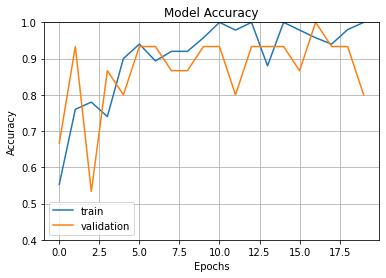

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()